## Extracting Images from the zip file

In [2]:
import zipfile
import os

# Define paths
zip_path = "/Users/munna/Downloads/TDA images.zip"  # Adjust if needed
extract_path = "TDA images"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
image_files = os.listdir(extract_path)
print(f"Extracted {len(image_files)} items:")
print(image_files[:10])

# Check for nested "TDA images" folder
subfolder_path = os.path.join(extract_path, "TDA images")
if os.path.exists(subfolder_path):
    image_files = os.listdir(subfolder_path)
    print(f"Found {len(image_files)} images inside 'TDA images' folder:")
    print(image_files[:10])
else:
    print("No 'TDA images' subfolder found. Images might be directly in the extracted folder.")


Extracted 2 items:
['__MACOSX', 'TDA images']
Found 101 images inside 'TDA images' folder:
['Mithila5.jpg', 'Mithila6.jpg', '.DS_Store', 'Mithila3.jpg', 'Mithila2.jpg', 'Dey7.jpeg', 'Gen9.jpg', 'Vin9.jpg', 'Robert9.jpg', 'Raja5.jpeg']


In [9]:
!pip install POT
!pip install gudhi

In [10]:
!pip install opencv-python gudhi tqdm


In [2]:
%matplotlib inline

# Imports
import os
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd
import gudhi as gd
import multiprocessing
import pickle
from pathlib import Path
from tqdm import tqdm
import itertools
import gudhi.wasserstein as gw


In [6]:
 # Folder with extracted images
image_folder = "TDA images"

# Get the list of image files
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

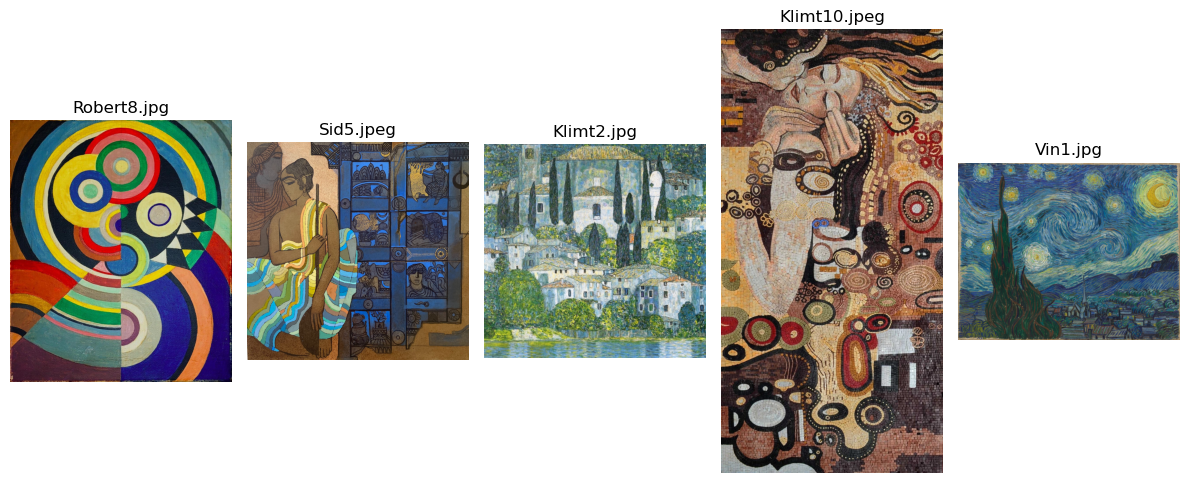

In [7]:
# Make sure image_folder is defined correctly
image_folder = "TDA images/TDA images"  # Adjust path as needed

# Check for valid image files
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Display a few sample images
num_samples = min(5, len(image_files))  # Display up to 5
sample_images = random.sample(image_files, num_samples)

plt.figure(figsize=(12, 6))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path)

    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(img_name)
        plt.axis("off")
    else:
        print(f"Warning: Could not read image {img_path}")

plt.tight_layout()
plt.show()


## Converting the images into Grayscale

In [9]:
processed_images = "TDA_processed_images"

if not os.path.exists(processed_images):
    os.makedirs(processed_images, exist_ok=True)


In [10]:
def display_image(ax, image, title, cmap=None):
    ax.imshow(image, cmap=cmap)
    ax.set_title(title, fontsize=9)
    ax.axis('off')

def display_images(processed_folders, prefixes, cmaps, image_folder, image_files):
    num_samples = min(4, len(image_files))  # Display up to 4 images
    sample_images = random.sample(image_files, num_samples)

    total_columns = 1 + len(processed_folders)  # Original + channels
    plt.figure(figsize=(4 * total_columns, 3 * num_samples))

    for i, img_name in enumerate(sample_images):
        row_index = i * total_columns

        # Original image
        orig_path = os.path.join(image_folder, img_name)
        orig_img = cv2.imread(orig_path)
        if orig_img is not None:
            orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

        # Display original
        plt.subplot(num_samples, total_columns, row_index + 1)
        display_image(plt.gca(), orig_img, "Original")

        # Display each processed channel (R, G, B, etc.)
        for j, (folder, prefix, cmap) in enumerate(zip(processed_folders, prefixes, cmaps)):
            processed_name = f"{prefix}_{img_name}" if prefix else img_name
            proc_path = os.path.join(folder, processed_name)
            if not os.path.exists(proc_path):
                print(f"Warning: {proc_path} not found.")
                proc_img = None
            else:
                proc_img = cv2.imread(proc_path, cv2.IMREAD_GRAYSCALE)

            title = f"{prefix or 'Processed'}"
            plt.subplot(num_samples, total_columns, row_index + j + 2)
            display_image(plt.gca(), proc_img, title, cmap)

    plt.tight_layout()
    plt.show()


Skipping invalid image: .DS_Store
Processed 100 images and saved them in grayscale folder.


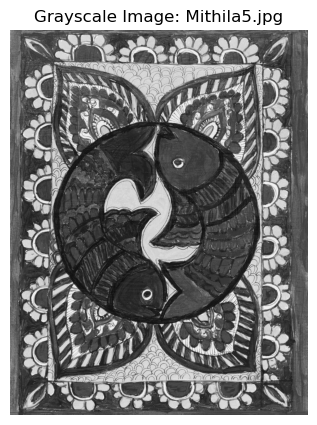

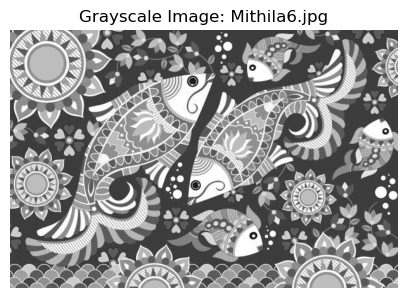

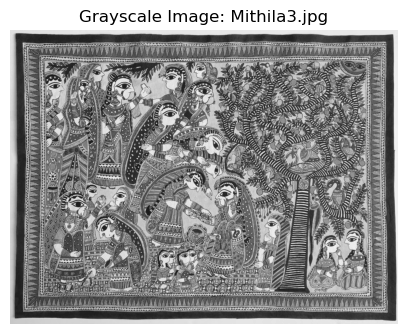

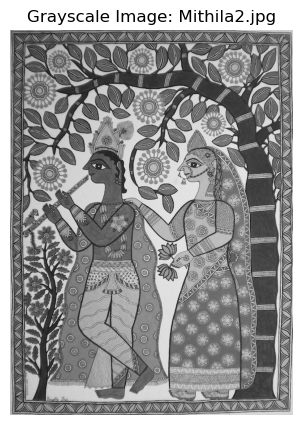

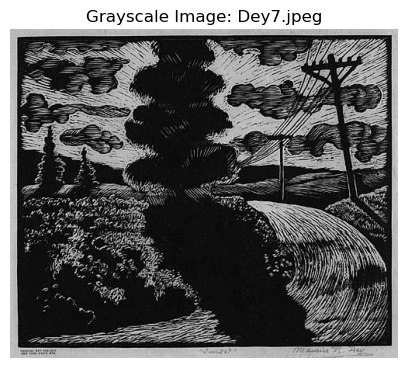

In [11]:
# Define the path to save the grayscale images
processed_images = '/Users/munna/Downloads/TDART/processed_images'  # Set the appropriate path
image_folder = '/Users/munna/Downloads/TDA images'  # Set the image folder path

# List of image files (replace this with your actual list of files)
image_files = os.listdir(image_folder)  # Assuming the image folder is correct

# Define the path to save the grayscale images
gray_folder = os.path.join(processed_images, "Gray_Images")

# Check if the grayscale folder exists; if not, create it
if not os.path.exists(gray_folder):
    os.makedirs(gray_folder, exist_ok=True)

# Initialize a list to keep track of successfully processed image file names
processed_files = []

# Loop through each image file in the list 'image_files'
for img_name in image_files:
    # Create the full path to the image file
    img_path = os.path.join(image_folder, img_name)

    # Read the image using OpenCV
    img = cv2.imread(img_path)

    # If the image is not read correctly (e.g., file is corrupted or not found), skip it
    if img is None:
        print(f"Skipping invalid image: {img_name}")
        continue

    # Convert the image from RGB (color) to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # OpenCV loads images as BGR, not RGB

    # Save the grayscale image to the specified folder with the same file name
    cv2.imwrite(os.path.join(gray_folder, img_name), gray_img)

    # Add the image name to the list of processed files
    processed_files.append(img_name)

# Print out how many images were successfully processed and saved
print(f"Processed {len(processed_files)} images and saved them in grayscale folder.")

# Display the processed grayscale images for visual confirmation
# Here, we will show a few examples of the processed images

# Get a few sample grayscale images to display (you can adjust this as needed)
sample_images = processed_files[:5]  # Display the first 5 images for preview

# Plot each sample image
for img_name in sample_images:
    img_path = os.path.join(gray_folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap='gray')
    plt.title(f'Grayscale Image: {img_name}')
    plt.axis('off')  # Hide the axes for better visualization
    plt.show()


## Converting the images into RGB Channel

Skipping invalid image: .DS_Store
Processed 100 images and saved them in RGB channel folders.


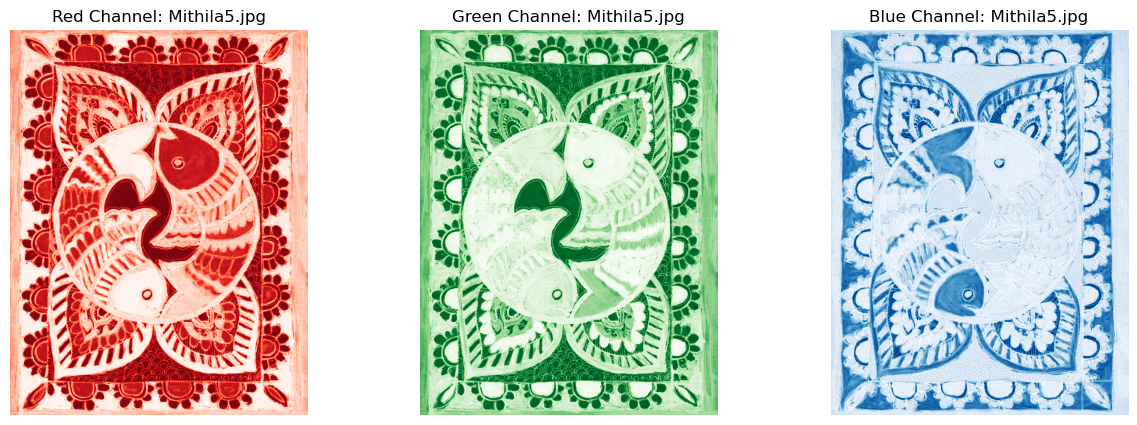

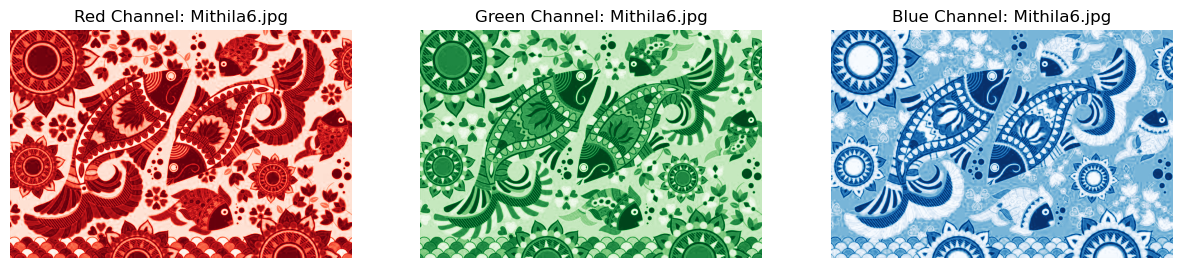

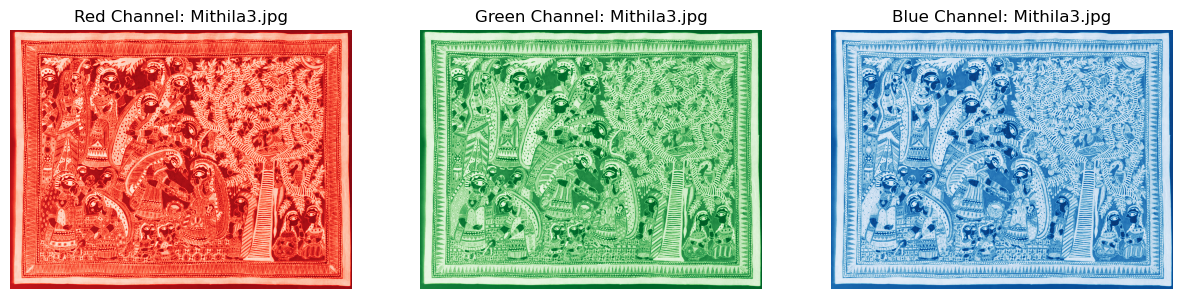

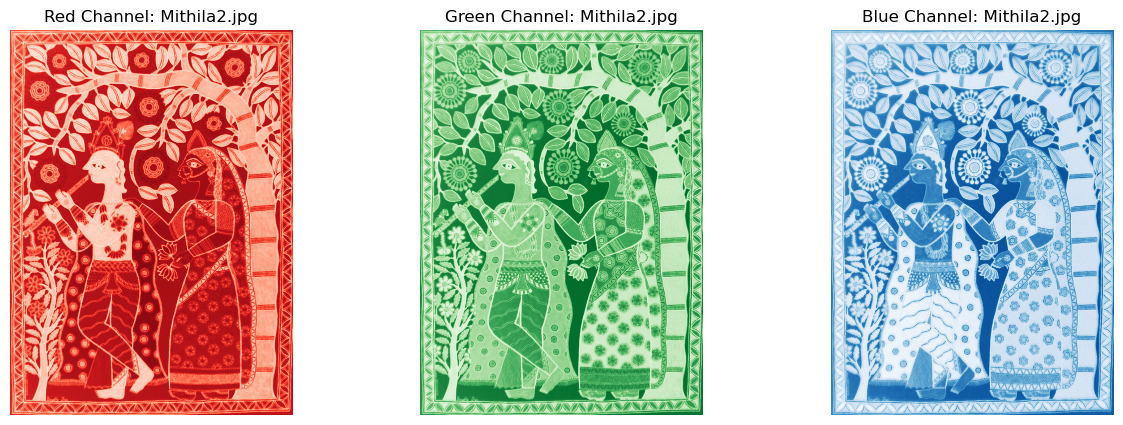

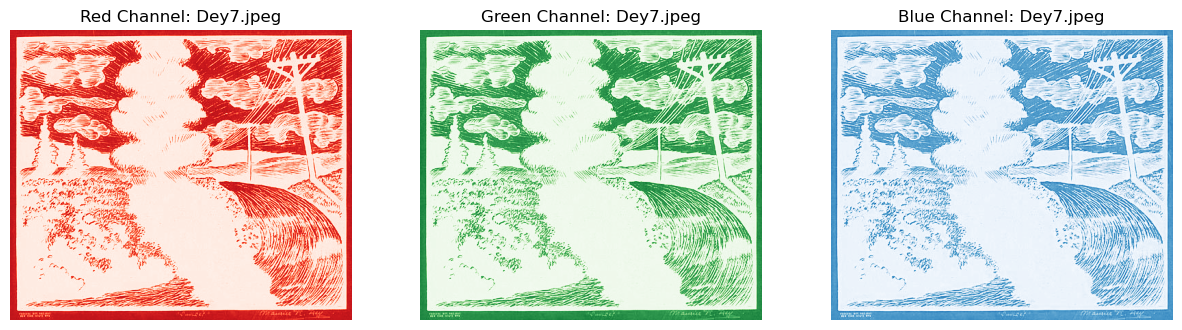

In [13]:
# Define paths for processed images and image folders
processed_images = '/Users/munna/Downloads/TDART/processed_images'  # Set the appropriate path
image_folder = '/Users/munna/Downloads/TDA images'  # Set the image folder path

# List of image files (replace this with your actual list of files)
image_files = os.listdir(image_folder)  # Assuming the image folder is correct

# Define folders to save individual RGB channel images
red_folder = os.path.join(processed_images, "Red_Images")
green_folder = os.path.join(processed_images, "Green_Images")
blue_folder = os.path.join(processed_images, "Blue_Images")

# Create the folders
os.makedirs(red_folder, exist_ok=True)
os.makedirs(green_folder, exist_ok=True)
os.makedirs(blue_folder, exist_ok=True)

# Initialize a list to keep track of successfully processed image file names
processed_files = []

# Loop through each image file in the list 'image_files'
for img_name in image_files:
    # Get the full path to the image
    img_path = os.path.join(image_folder, img_name)

    # Read the image using OpenCV (default color format is BGR)
    img = cv2.imread(img_path)

    # If image loading fails (e.g., corrupted or missing file), skip it
    if img is None:
        print(f"Skipping invalid image: {img_name}")
        continue

    # Convert the image from BGR to RGB format (since OpenCV loads in BGR by default)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Split the RGB image into individual R, G, and B channels
    R, G, B = cv2.split(img)

    # Save each channel as a separate image
    cv2.imwrite(os.path.join(red_folder, f"R_{img_name}"), R)
    cv2.imwrite(os.path.join(green_folder, f"G_{img_name}"), G)
    cv2.imwrite(os.path.join(blue_folder, f"B_{img_name}"), B)

    # Record the processed image name
    processed_files.append(img_name)

# Print out how many images were successfully processed and saved
print(f"Processed {len(processed_files)} images and saved them in RGB channel folders.")

# Display the individual R, G, and B channel images for visual confirmation
# Select a few sample images for each channel
sample_images = processed_files[:5]  # Display the first 5 images for preview

# Plot each channel's sample images
for img_name in sample_images:
    # Load the RGB channels for each image
    img_path = os.path.join(red_folder, f"R_{img_name}")
    R = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Red channel
    
    img_path = os.path.join(green_folder, f"G_{img_name}")
    G = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Green channel
    
    img_path = os.path.join(blue_folder, f"B_{img_name}")
    B = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Blue channel

    # Plot each channel separately
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Display the Red channel
    axes[0].imshow(R, cmap='Reds')
    axes[0].set_title(f'Red Channel: {img_name}')
    axes[0].axis('off')  # Hide the axes

    # Display the Green channel
    axes[1].imshow(G, cmap='Greens')
    axes[1].set_title(f'Green Channel: {img_name}')
    axes[1].axis('off')  # Hide the axes

    # Display the Blue channel
    axes[2].imshow(B, cmap='Blues')
    axes[2].set_title(f'Blue Channel: {img_name}')
    axes[2].axis('off')  # Hide the axes

    plt.show()


## Edge Detection

Skipping invalid image: .DS_Store
Processed 100 images and saved them in the edge-detection folder.


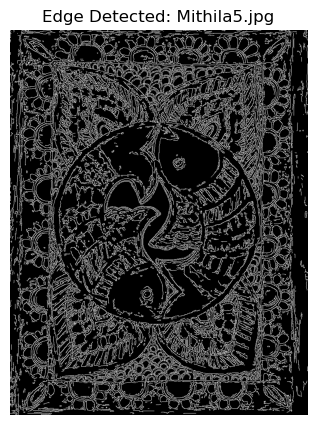

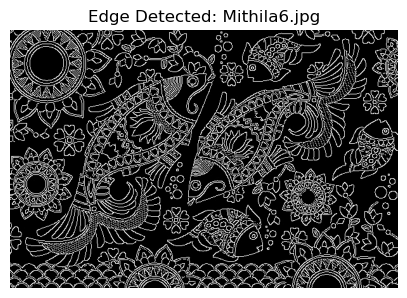

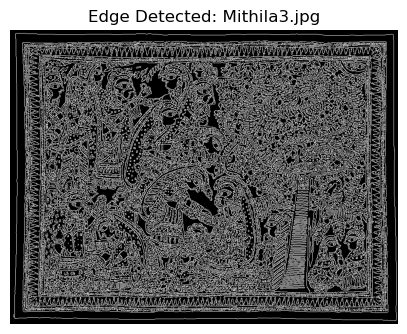

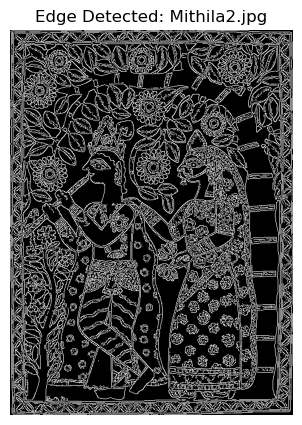

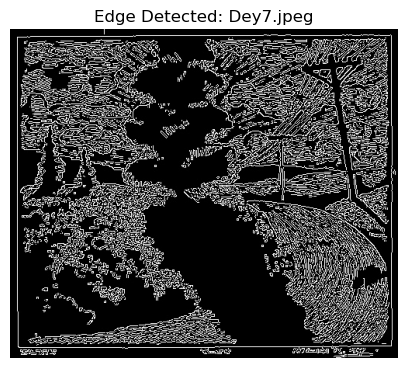

In [15]:
# Define the path to store images after applying edge detection
processed_images = '/Users/munna/Downloads/TDART/processed_images'  # Set the appropriate path
image_folder = '/Users/munna/Downloads/TDA images'  # Set the image folder path

# List of image files (replace this with your actual list of files)
image_files = os.listdir(image_folder)  # Assuming the image folder is correct

# Define the folder for edge-detected images
edge_folder = os.path.join(processed_images, "Edge_Images")

# Create the folder if it doesn't already exist
if not os.path.exists(edge_folder):
    os.makedirs(edge_folder, exist_ok=True)

# List to keep track of successfully processed image file names
processed_files = []

# Loop through each image in the provided list of image files
for img_name in image_files:
    # Create the full file path for the current image
    img_path = os.path.join(image_folder, img_name)

    # Read the image in grayscale mode (since edge detection works on single-channel images)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # If the image couldn't be read (e.g., missing or corrupted), skip it
    if img is None:
        print(f"Skipping invalid image: {img_name}")
        continue

    # Apply Canny edge detection to the grayscale image
    edges = cv2.Canny(img, 100, 200)

    # Save the resulting edge-detected image to the output folder
    cv2.imwrite(os.path.join(edge_folder, img_name), edges)

    # Add the image name to the list of successfully processed images
    processed_files.append(img_name)

# Print out the total number of images that were processed and saved
print(f"Processed {len(processed_files)} images and saved them in the edge-detection folder.")

# Display the edge-detected images for visual confirmation
# Select a few sample edge-detected images for preview
sample_images = processed_files[:5]  # Display the first 5 images for preview

# Plot the edge-detected images
for img_name in sample_images:
    img_path = os.path.join(edge_folder, img_name)
    edge_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Display each edge-detected image
    plt.figure(figsize=(5, 5))
    plt.imshow(edge_img, cmap='gray')
    plt.title(f'Edge Detected: {img_name}')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()


## Computing Persistent Homology using cubical complexes

In [17]:
# Define image folders
image_folders = "/Users/munna/Downloads/TDART/processed_images"

# Get the list of subfolders
subfolders = [os.path.join(image_folders, subfolder) for subfolder in os.listdir(image_folders) if os.path.isdir(os.path.join(image_folders, subfolder))]

persistance_results = "/Users/munna/Downloads/TDART/TDA_Persistence_Results"

if not os.path.exists(persistance_results):
  os.makedirs(persistance_results, exist_ok=True)

✅ Saved persistence results for Blue_Images in /Users/munna/Downloads/TDART/TDA_Persistence_Results/Blue_Images
✅ Saved persistence results for Red_Images in /Users/munna/Downloads/TDART/TDA_Persistence_Results/Red_Images
✅ Saved persistence results for Edge_Images in /Users/munna/Downloads/TDART/TDA_Persistence_Results/Edge_Images
✅ Saved persistence results for Gray_Images in /Users/munna/Downloads/TDART/TDA_Persistence_Results/Gray_Images
✅ Saved persistence results for Green_Images in /Users/munna/Downloads/TDART/TDA_Persistence_Results/Green_Images


/opt/anaconda3/lib/python3.12/site-packages/gudhi/persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


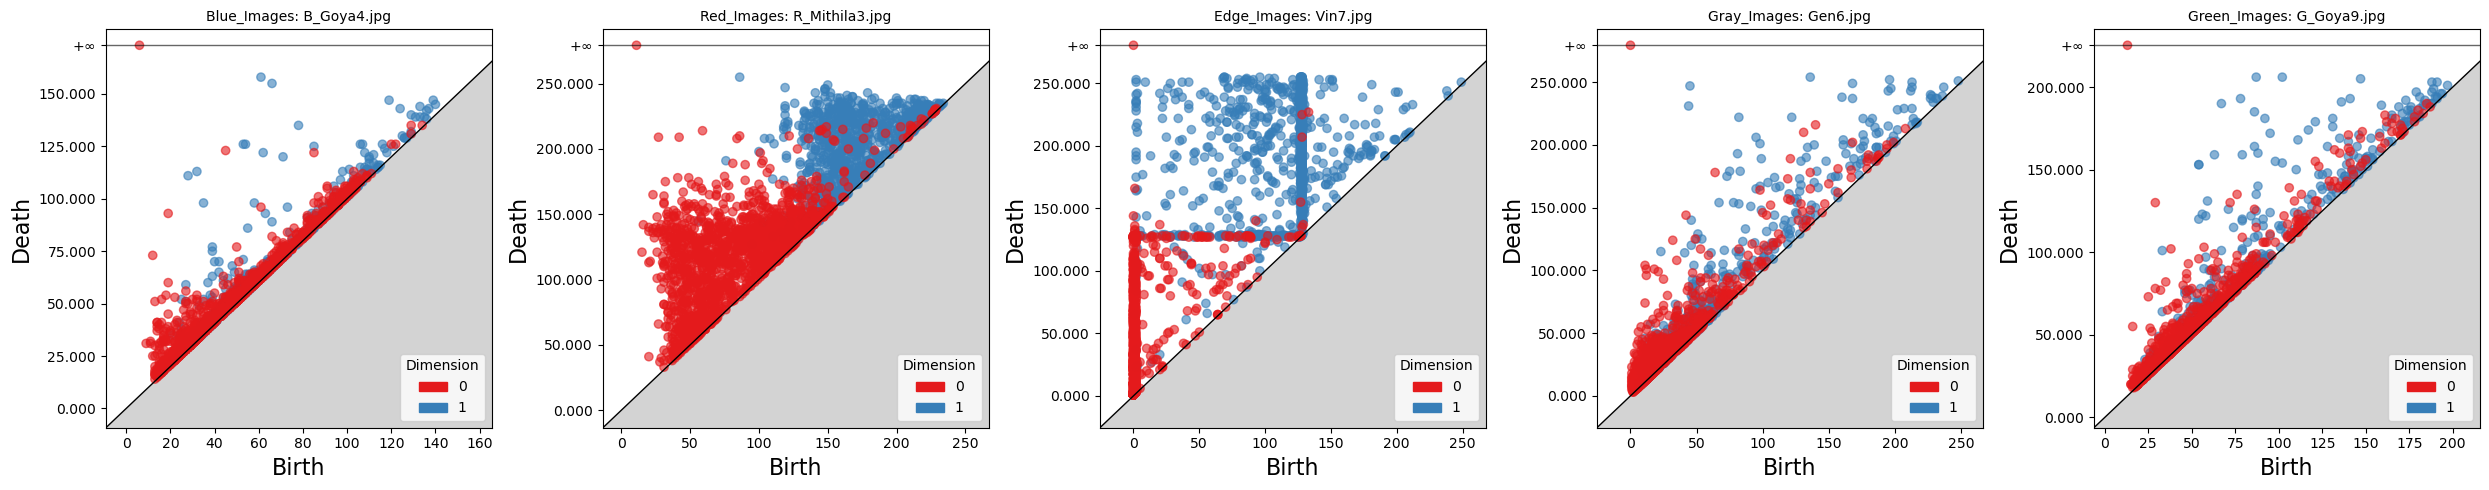

In [18]:
# Define image folders and result folder
image_folders = "/Users/munna/Downloads/TDART/processed_images"
persistance_results = "/Users/munna/Downloads/TDART/TDA_Persistence_Results"

# Get the list of subfolders
subfolders = [os.path.join(image_folders, subfolder) for subfolder in os.listdir(image_folders) if os.path.isdir(os.path.join(image_folders, subfolder))]

# Ensure result directory exists
os.makedirs(persistance_results, exist_ok=True)

# Function to create Cubical Complex from grayscale image
def image_to_cubical_complex(image_gray, resolution=100):
    image_resized = cv2.resize(image_gray, (resolution, resolution))
    image_array = np.array(image_resized, dtype=np.float32)
    vertex_array = np.pad(image_array, pad_width=1, mode='edge')
    return gd.CubicalComplex(vertices=vertex_array)

# Function to compute persistent homology
def compute_persistent_homology(image_path):
    image_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image_gray is None:
        print(f"⚠️ Error: Could not load {image_path}")
        return None
    cubical_complex = image_to_cubical_complex(image_gray)
    return cubical_complex.persistence()

# Function to process a single folder
def process_folder(folder_name, folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
    if not image_files:
        print(f"⚠️ No images found in {folder_path}")
        return {}

    folder_output_dir = os.path.join(persistance_results, folder_name)
    os.makedirs(folder_output_dir, exist_ok=True)

    persistence_results = {}
    for filename in image_files:
        image_path = os.path.join(folder_path, filename)
        persistence = compute_persistent_homology(image_path)
        if persistence:
            persistence_results[filename] = persistence
            output_file = os.path.join(folder_output_dir, f"{filename}_persistence.pkl")
            with open(output_file, "wb") as f:
                pickle.dump(persistence, f)

    print(f"✅ Saved persistence results for {folder_name} in {folder_output_dir}")
    return persistence_results

# Function to plot one random persistence diagram per folder
def plot_random_persistence(all_results):
    fig, axes = plt.subplots(1, len(all_results), figsize=(5 * len(all_results), 5))
    if len(all_results) == 1:
        axes = [axes]

    for ax, (folder_name, persistence_data) in zip(axes, all_results.items()):
        if not persistence_data:
            print(f"⚠️ No persistence data for {folder_name}.")
            continue

        filename, persistence = random.choice(list(persistence_data.items()))
        gd.plot_persistence_diagram(persistence, axes=ax)
        ax.set_title(f"{folder_name}: {filename}", fontsize=10)

    plt.tight_layout()
    plt.show()

# Run sequentially (no multiprocessing)
all_persistence = {}
for subfolder in subfolders:
    folder_name = os.path.basename(subfolder)
    result = process_folder(folder_name, subfolder)
    if result:
        all_persistence[folder_name] = result

# Plot results
plot_random_persistence(all_persistence)


In [19]:
from pathlib import Path
from tqdm import tqdm  # better for Jupyter


class BarcodeGenerator:
    def __init__(self, persistence_dir, barcode_output_dir):
        self.persistence_dir = Path(persistence_dir)
        self.barcode_output_dir = Path(barcode_output_dir)
        self.barcode_output_dir.mkdir(parents=True, exist_ok=True)

    def generate_barcode(self, persistence, output_path, title):
        """Generate and save barcode plot from persistence data"""
        try:
            plt.figure(figsize=(10, 5))
            gd.plot_persistence_barcode(persistence)
            plt.title(title)
            plt.tight_layout()
            plt.savefig(output_path, dpi=300, bbox_inches='tight')
        except Exception as e:
            print(f"❌ Error generating barcode: {str(e)}")
        finally:
            plt.clf()
            plt.close('all')

    def process_folder(self, folder_name):
        """Process all persistence files in a folder"""
        folder_path = self.persistence_dir / folder_name
        output_folder = self.barcode_output_dir / folder_name
        output_folder.mkdir(parents=True, exist_ok=True)

        print(f"\n🔄 Processing {folder_name}...")
        persistence_files = list(folder_path.glob("*_persistence.pkl"))

        for pkl_path in tqdm(persistence_files, desc=f"Processing {folder_name}"):
            try:
                with open(pkl_path, 'rb') as f:
                    persistence = pickle.load(f)

                output_name = f"{pkl_path.stem.replace('_persistence', '')}_barcode.png"
                output_path = output_folder / output_name

                self.generate_barcode(
                    persistence,
                    output_path,
                    f"Barcode: {folder_name} - {pkl_path.stem}"
                )

            except Exception as e:
                print(f"❌ Error processing {pkl_path.name}: {str(e)}")

    def process_all_folders(self):
        """Process all folders containing persistence data"""
        folders = [
            'Edge_Images',
            'Red_Images',
            'Blue_Images',
            'Green_Images',
            'Gray_Images'
        ]

        for folder in folders:
            self.process_folder(folder)

# Run this manually in a cell
generator = BarcodeGenerator(
    persistence_dir="/Users/munna/Downloads/TDART/TDA_Persistence_Results",
    barcode_output_dir="/Users/munna/Downloads/TDART/TDA_Barcode_Results"
)
generator.process_all_folders()

print("\n✅ Barcode generation complete!")



🔄 Processing Edge_Images...


Processing Edge_Images: 100%|█████████████████| 100/100 [01:27<00:00,  1.15it/s]



🔄 Processing Red_Images...


Processing Red_Images: 100%|██████████████████| 100/100 [02:11<00:00,  1.32s/it]



🔄 Processing Blue_Images...


Processing Blue_Images: 100%|█████████████████| 100/100 [02:20<00:00,  1.41s/it]



🔄 Processing Green_Images...


Processing Green_Images: 100%|████████████████| 100/100 [02:21<00:00,  1.41s/it]



🔄 Processing Gray_Images...


Processing Gray_Images: 100%|█████████████████| 100/100 [02:24<00:00,  1.45s/it]


✅ Barcode generation complete!


## Calculating Bottleneck Distance and Wasserstein Distance

In [21]:
!pip install ipywidgets


In [50]:
import pickle
import numpy as np
from tqdm.auto import tqdm
tqdm.pandas()

def load_persistence_diagram(file_path):
    """
    Load a persistence diagram from a pickle file and return H0 and H1 components as NumPy arrays.
    Handles various data formats typically saved in persistence computation.
    """

    try:
        # Step 1: Load data from the pickle file
        with open(file_path, 'rb') as f:
            data = pickle.load(f)

        h0, h1 = [], []  # Initialize lists for H0 and H1

        # Format: list of (dim, (birth, death)) tuples
        if isinstance(data, list) and all(isinstance(d, tuple) and isinstance(d[1], tuple) for d in data):
            for dim, (birth, death) in data:
                if dim == 0:
                    h0.append([birth, death])
                elif dim == 1:
                    h1.append([birth, death])
            return np.array(h0), np.array(h1)

        # Format: list of two arrays/lists: [H0, H1]
        elif isinstance(data, list) and len(data) == 2:
            return np.array(data[0]), np.array(data[1])

        # Format: dictionary with 'H0' and 'H1' keys
        elif isinstance(data, dict):
            h0 = data.get("H0", [])
            h1 = data.get("H1", [])
            return np.array(h0), np.array(h1)

        else:
            print(f"⚠️ Unexpected format in {file_path}")
            return np.array([]), np.array([])

    except Exception as e:
        print(f"❌ Failed to load {file_path}: {e}")
        return np.array([]), np.array([])


In [52]:
def compute_bottleneck_distances(folder_path):
    """
    Compute pairwise bottleneck distances (H0 and H1) for all persistence diagrams in a folder.
    Works well in Jupyter Notebook.
    """
    folder_path = Path(folder_path)  # Ensure it's a Path object
    folder_name = folder_path.name
    print(f"\n📁 Processing folder: {folder_name}")

    # Step 1: Get all .pkl files
    ph_files = sorted(folder_path.glob("*.pkl"))

    if len(ph_files) < 2:
        print("⚠️ Not enough files to compute distances.")
        return None, None

    # Step 2: Load all diagrams
    diagrams = {}
    for file in tqdm(ph_files, desc="📦 Loading diagrams", disable=True):
        h0, h1 = load_persistence_diagram(file)
        if h0 is not None and h1 is not None:
            diagrams[file.name] = (h0, h1)

    if len(diagrams) < 2:
        print("⚠️ Not enough valid diagrams.")
        return None, None

    # Step 3: Prepare distance matrices
    files = list(diagrams.keys())
    n = len(files)
    dist_h0 = np.zeros((n, n))
    dist_h1 = np.zeros((n, n))

    # Step 4: Compute distances
    for i, j in tqdm(itertools.combinations(range(n), 2), total=n*(n-1)//2, desc="🔁 Computing distances", disable=True):
        f1, f2 = files[i], files[j]
        try:
            d0 = gd.bottleneck_distance(diagrams[f1][0], diagrams[f2][0])
            d1 = gd.bottleneck_distance(diagrams[f1][1], diagrams[f2][1])

            dist_h0[i, j] = dist_h0[j, i] = d0
            dist_h1[i, j] = dist_h1[j, i] = d1

        except Exception as e:
            print(f"❌ Error between {f1} and {f2}: {e}")
            dist_h0[i, j] = dist_h0[j, i] = np.nan
            dist_h1[i, j] = dist_h1[j, i] = np.nan

    # Step 5: Convert to DataFrames
    df_h0 = pd.DataFrame(dist_h0, index=files, columns=files)
    df_h1 = pd.DataFrame(dist_h1, index=files, columns=files)

    print("✅ Bottleneck distance computation complete!")
    return df_h0, df_h1


In [62]:
import gudhi.wasserstein as gw  # Make sure gudhi is installed
# Make sure load_persistence_diagram(file_path) is defined as before

def compute_wasserstein_distances(folder_path, order=1):
    """
    Compute pairwise Wasserstein distances (H0 and H1) between persistence diagrams in a folder.
    Works smoothly in Jupyter Notebook.
    """
    folder_path = Path(folder_path)
    folder_name = folder_path.name
    print(f"\n📂 Processing: {folder_name}")

    # Step 1: Find all .pkl files
    pkl_files = sorted(folder_path.glob("*.pkl"))
    if len(pkl_files) < 2:
        print("⚠️ Not enough files to compute distances.")
        return None, None

    # Step 2: Load persistence diagrams
    diagrams = {}
    for file in tqdm(pkl_files, desc="📦 Loading diagrams", disable=True):
        h0, h1 = load_persistence_diagram(file)
        if h0 is not None and h1 is not None:
            diagrams[file.name] = (h0, h1)

    if len(diagrams) < 2:
        print("⚠️ Not enough valid diagrams.")
        return None, None

    # Step 3: Prepare distance matrices
    image_names = list(diagrams.keys())
    n = len(image_names)
    wasserstein_h0_matrix = np.zeros((n, n))
    wasserstein_h1_matrix = np.zeros((n, n))

    # Step 4: Compute distances with progress
    for i, j in tqdm(itertools.combinations(range(n), 2), total=n*(n-1)//2, desc="🔁 Computing distances", disable=True):
        f1, f2 = image_names[i], image_names[j]
        try:
            d0 = gw.wasserstein_distance(diagrams[f1][0], diagrams[f2][0], order=order)
            d1 = gw.wasserstein_distance(diagrams[f1][1], diagrams[f2][1], order=order)

            wasserstein_h0_matrix[i, j] = wasserstein_h0_matrix[j, i] = d0
            wasserstein_h1_matrix[i, j] = wasserstein_h1_matrix[j, i] = d1
        except Exception as e:
            print(f"❌ Error between {f1} and {f2}: {e}")
            wasserstein_h0_matrix[i, j] = wasserstein_h0_matrix[j, i] = np.nan
            wasserstein_h1_matrix[i, j] = wasserstein_h1_matrix[j, i] = np.nan

    # Step 5: Create DataFrames
    df_h0 = pd.DataFrame(wasserstein_h0_matrix, index=image_names, columns=image_names)
    df_h1 = pd.DataFrame(wasserstein_h1_matrix, index=image_names, columns=image_names)

    print("✅ Wasserstein distance computation complete!")
    return df_h0, df_h1


In [56]:
def process_all_folders(base_dir, output_dir, method="bottleneck", order=1):
    """
    Compute Bottleneck or Wasserstein distances for all subfolders inside a base directory.
    Each subfolder must contain .pkl files with persistence diagrams.

    Args:
        base_dir (str or Path): Folder containing subfolders of diagrams.
        output_dir (str or Path): Folder to save the resulting distance CSVs.
        method (str): Either 'bottleneck' or 'wasserstein'.
        order (int): Order for Wasserstein distance (only used if method='wasserstein').
    """
    base_dir = Path(base_dir)
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    subfolders = [f for f in base_dir.iterdir() if f.is_dir()]
    if not subfolders:
        print("⚠️ No subfolders found to process.")
        return

    print(f"\n📦 Found {len(subfolders)} folders in '{base_dir.name}'")

    for folder in tqdm(subfolders, desc="🔁 Processing folders"):
        print(f"\n📁 Processing: {folder.name} ({method} distance)")

        # Compute distances using the selected method
        if method == "bottleneck":
            df_h0, df_h1 = compute_bottleneck_distances(folder)
            suffix = "bottleneck"
        elif method == "wasserstein":
            df_h0, df_h1 = compute_wasserstein_distances(folder, order=order)
            suffix = f"wasserstein_order{order}"
        else:
            print(f"❌ Unsupported method: {method}")
            continue

        # Save outputs if both distance matrices are valid
        if df_h0 is not None and df_h1 is not None:
            df_h0_path = output_dir / f"{folder.name}_H0_{suffix}.csv"
            df_h1_path = output_dir / f"{folder.name}_H1_{suffix}.csv"
            df_h0.to_csv(df_h0_path)
            df_h1.to_csv(df_h1_path)
            print(f"✅ Saved: {df_h0_path.name}, {df_h1_path.name}")
        else:
            print(f"⚠️ Skipped {folder.name} (invalid/missing data)")


In [42]:
persistence_data_folder = Path("/Users/munna/Downloads/TDART/TDA_Persistence_Results")
bottleneck_output = Path("/Users/munna/Downloads/TDART/Bottleneck_Distances")

# Make sure output folder exists
bottleneck_output.mkdir(parents=True, exist_ok=True)

# Run bottleneck processing
process_all_folders(persistence_data_folder, bottleneck_output, method="bottleneck")



📦 Found 5 folders in 'TDA_Persistence_Results'


🔁 Processing folders:   0%|          | 0/5 [00:00<?, ?it/s]


📁 Processing: Blue_Images (bottleneck distance)

📁 Processing folder: Blue_Images
✅ Bottleneck distance computation complete!
✅ Saved: Blue_Images_H0_bottleneck.csv, Blue_Images_H1_bottleneck.csv

📁 Processing: Red_Images (bottleneck distance)

📁 Processing folder: Red_Images
✅ Bottleneck distance computation complete!
✅ Saved: Red_Images_H0_bottleneck.csv, Red_Images_H1_bottleneck.csv

📁 Processing: Edge_Images (bottleneck distance)

📁 Processing folder: Edge_Images
✅ Bottleneck distance computation complete!
✅ Saved: Edge_Images_H0_bottleneck.csv, Edge_Images_H1_bottleneck.csv

📁 Processing: Gray_Images (bottleneck distance)

📁 Processing folder: Gray_Images
✅ Bottleneck distance computation complete!
✅ Saved: Gray_Images_H0_bottleneck.csv, Gray_Images_H1_bottleneck.csv

📁 Processing: Green_Images (bottleneck distance)

📁 Processing folder: Green_Images
✅ Bottleneck distance computation complete!
✅ Saved: Green_Images_H0_bottleneck.csv, Green_Images_H1_bottleneck.csv


In [64]:
persistence_data_folder = Path("/Users/munna/Downloads/TDART/TDA_Persistence_Results")

 # --- Wasserstein ---
wasserstein_output = Path("/Users/munna/Downloads/TDART/Wasserstein_Distances")
wasserstein_output.mkdir(parents=True, exist_ok=True)
process_all_folders(persistence_data_folder, wasserstein_output, method="wasserstein")



📦 Found 5 folders in 'TDA_Persistence_Results'


🔁 Processing folders:   0%|          | 0/5 [00:00<?, ?it/s]


📁 Processing: Blue_Images (wasserstein distance)

📂 Processing: Blue_Images
✅ Wasserstein distance computation complete!
✅ Saved: Blue_Images_H0_wasserstein_order1.csv, Blue_Images_H1_wasserstein_order1.csv

📁 Processing: Red_Images (wasserstein distance)

📂 Processing: Red_Images
✅ Wasserstein distance computation complete!
✅ Saved: Red_Images_H0_wasserstein_order1.csv, Red_Images_H1_wasserstein_order1.csv

📁 Processing: Edge_Images (wasserstein distance)

📂 Processing: Edge_Images
✅ Wasserstein distance computation complete!
✅ Saved: Edge_Images_H0_wasserstein_order1.csv, Edge_Images_H1_wasserstein_order1.csv

📁 Processing: Gray_Images (wasserstein distance)

📂 Processing: Gray_Images
✅ Wasserstein distance computation complete!
✅ Saved: Gray_Images_H0_wasserstein_order1.csv, Gray_Images_H1_wasserstein_order1.csv

📁 Processing: Green_Images (wasserstein distance)

📂 Processing: Green_Images
✅ Wasserstein distance computation complete!
✅ Saved: Green_Images_H0_wasserstein_order1.csv,

## Permutation Test Calculation

In [4]:
from tqdm.notebook import tqdm

def perform_permutation_test(artist_name, distance_df, num_permutations=1000, show_progress=True):
    """
    Perform a permutation test to assess whether the average distance between
    one artist's images and other images is significantly different from random.

    Args:
        artist_name (str): Name/prefix used to identify the artist's images.
        distance_df (pd.DataFrame): Pairwise distance matrix (DataFrame).
        num_permutations (int): Number of permutations for generating null distribution.
        show_progress (bool): Whether to show progress bar.

    Returns:
        p_value (float): The probability of observing the mean distance or lower by chance.
        observed_mean (float): The actual mean distance between the artist and others.
    """
    # Clean index: remove non-printable characters and strip whitespace
    distance_df.index = distance_df.index.to_series().apply(
        lambda x: ''.join(filter(str.isprintable, str(x)))
    ).str.strip()
    distance_df.columns = distance_df.columns.to_series().apply(
        lambda x: ''.join(filter(str.isprintable, str(x)))
    ).str.strip()

    # Identify artist and other images
    artist_images = [img for img in distance_df.index if img.startswith(artist_name)]
    other_images = [img for img in distance_df.index if not img.startswith(artist_name)]

    if not artist_images or not other_images:
        raise ValueError(f"No valid images for artist '{artist_name}'.")

    # Compute observed mean distance
    observed_distances = [
        distance_df.loc[img1, img2]
        for img1 in artist_images
        for img2 in other_images
        if img2 in distance_df.columns
    ]

    if not observed_distances:
        raise ValueError(f"No valid distances found for artist '{artist_name}'.")

    observed_mean = np.mean(observed_distances)

    # Build null distribution
    all_distances = distance_df.values[np.triu_indices_from(distance_df.values, k=1)]

    permutation_means = []
    iterator = tqdm(range(num_permutations), desc="Permuting", disable=not show_progress)
    for _ in iterator:
        sample = np.random.choice(all_distances, size=len(observed_distances), replace=False)
        permutation_means.append(np.mean(sample))

    # Compute p-value
    p_value = np.mean(np.array(permutation_means) < observed_mean)

    # Print results
    print(f"\n🎨 Artist: {artist_name}")
    print(f"🔍 Observed Mean Distance: {observed_mean:.4f}")
    print(f"📊 p-value: {p_value:.4f} (based on {num_permutations} permutations)")

    return p_value, observed_mean


In [6]:
def analyze_distances_for_file(file_path, distance_type="Bottleneck", output_folder=None):
    """
    Analyze a pairwise distance matrix (CSV) and perform permutation tests per artist.

    Args:
        file_path (str or Path): Path to the CSV file containing the distance matrix.
        distance_type (str): Type of distance ('Bottleneck' or 'Wasserstein') for labeling results.
        output_folder (str or Path, optional): Folder to save the results.

    Returns:
        results_df (pd.DataFrame): DataFrame containing p-values and significance results per artist.
    """
    try:
        file_path = Path(file_path)  # Convert to Path if it's a string
        df = pd.read_csv(file_path, index_col=0)

        # Clean index and column names
        df.index = df.index.to_series().apply(
            lambda x: ''.join(filter(str.isprintable, str(x)))
        ).str.strip()
        df.columns = df.columns.to_series().apply(
            lambda x: ''.join(filter(str.isprintable, str(x)))
        ).str.strip()

        print(f"\n📄 Processing file: {file_path.name}")

        # Extract unique artist names
        artists = sorted(set(img.split('.')[0].rstrip('0123456789') for img in df.index))
        print(f"🎨 Detected artists: {artists}")

        results = []

        # Run permutation test per artist
        for artist in artists:
            try:
                p_value, mean_distance = perform_permutation_test(artist, df)
                results.append({
                    'Artist': artist,
                    'P-Value': f"{p_value:.4f}",
                    'Mean_Distance': f"{mean_distance:.4f}",
                    'Significance': 'Significant' if p_value < 0.05 or p_value > 0.95 else 'Not Significant'
                })
            except (KeyError, ValueError) as e:
                print(f"⚠️ Error for artist '{artist}' in file '{file_path.name}': {e}")
                continue

        results_df = pd.DataFrame(results)

        # Set output folder
        if output_folder is None:
            output_folder = file_path.parent
        else:
            output_folder = Path(output_folder)
            output_folder.mkdir(parents=True, exist_ok=True)  # Create if doesn't exist

        # Save results
        output_file = output_folder / (file_path.stem + f'_results_{distance_type}.csv')
        results_df.to_csv(output_file, index=False)
        print(f"✅ Results saved to: {output_file}")

        return results_df

    except Exception as e:
        print(f"❌ Error processing file '{file_path}': {e}")
        return pd.DataFrame()


In [8]:
def analyze_distances_in_folder(folder_path, distance_type="Bottleneck"):
    """
    Analyze all CSV distance matrices in a folder using permutation tests.

    Args:
        folder_path (str or Path): Path to the folder containing CSV distance matrices.
        distance_type (str): 'Bottleneck' or 'Wasserstein' for labeling result files.

    Returns:
        all_results (dict): A dictionary mapping each CSV filename to its result DataFrame.
    """
    folder_path = Path(folder_path)  # Ensure it's a Path object

    if not folder_path.exists() or not folder_path.is_dir():
        print(f"❌ Folder not found: {folder_path}")
        return {}

    # Define output folder
    output_folder = folder_path.parent / f"{distance_type}_PTest"
    output_folder.mkdir(parents=True, exist_ok=True)  # Create if doesn't exist

    # Gather all CSV files in the folder
    csv_files = list(folder_path.glob("*.csv"))

    if not csv_files:
        print(f"⚠️ No CSV files found in {folder_path}")
        return {}

    all_results = {}

    # Process each CSV file
    for csv_file in csv_files:
        print(f"\n📄 Processing file: {csv_file.name}")
        results_df = analyze_distances_for_file(
            csv_file, distance_type=distance_type, output_folder=output_folder
        )
        all_results[csv_file.name] = results_df

    print(f"\n✅ Completed analysis of {len(all_results)} files.")
    return all_results


## Wasserstein

In [10]:
folder_path = "/Users/munna/Downloads/TDART/Wasserstein_Distances"  
distance_type = "Wasserstein"

# Call the function to analyze distances
all_results = analyze_distances_in_folder(folder_path, distance_type=distance_type)

# Display the results
for file_name, result_df in all_results.items():
    print(f"\nResults for {file_name}:")
    print("=" * 80)
    print(result_df.to_string(index=False))



📄 Processing file: Red_Images_H1_wasserstein_order1.csv

📄 Processing file: Red_Images_H1_wasserstein_order1.csv
🎨 Detected artists: ['R_Dey', 'R_Gen', 'R_Goya', 'R_Klimt', 'R_Mithila', 'R_Raja', 'R_Ren', 'R_Robert', 'R_Sid', 'R_Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Dey
🔍 Observed Mean Distance: 7026.1172
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Gen
🔍 Observed Mean Distance: 6778.4228
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Goya
🔍 Observed Mean Distance: 6582.0061
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Klimt
🔍 Observed Mean Distance: 8032.3911
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Mithila
🔍 Observed Mean Distance: 10826.4733
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Raja
🔍 Observed Mean Distance: 6012.1828
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Ren
🔍 Observed Mean Distance: 8887.9200
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Robert
🔍 Observed Mean Distance: 6478.9256
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Sid
🔍 Observed Mean Distance: 7247.0089
📊 p-value: 0.0160 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Vin
🔍 Observed Mean Distance: 8244.6256
📊 p-value: 1.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Wasserstein_PTest/Red_Images_H1_wasserstein_order1_results_Wasserstein.csv

📄 Processing file: Red_Images_H0_wasserstein_order1.csv

📄 Processing file: Red_Images_H0_wasserstein_order1.csv
🎨 Detected artists: ['R_Dey', 'R_Gen', 'R_Goya', 'R_Klimt', 'R_Mithila', 'R_Raja', 'R_Ren', 'R_Robert', 'R_Sid', 'R_Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Dey
🔍 Observed Mean Distance: 13566.5017
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Gen
🔍 Observed Mean Distance: 13271.9678
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Goya
🔍 Observed Mean Distance: 12826.4783
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Klimt
🔍 Observed Mean Distance: 18034.7800
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Mithila
🔍 Observed Mean Distance: 25021.5200
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Raja
🔍 Observed Mean Distance: 12165.6617
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Ren
🔍 Observed Mean Distance: 15126.8439
📊 p-value: 0.4780 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Robert
🔍 Observed Mean Distance: 13365.8678
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Sid
🔍 Observed Mean Distance: 15828.0144
📊 p-value: 0.9980 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Vin
🔍 Observed Mean Distance: 16334.2089
📊 p-value: 1.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Wasserstein_PTest/Red_Images_H0_wasserstein_order1_results_Wasserstein.csv

📄 Processing file: Gray_Images_H0_wasserstein_order1.csv

📄 Processing file: Gray_Images_H0_wasserstein_order1.csv
🎨 Detected artists: ['Dey', 'Gen', 'Goya', 'Klimt', 'Mithila', 'Raja', 'Ren', 'Robert', 'Sid', 'Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Dey
🔍 Observed Mean Distance: 12483.7789
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Gen
🔍 Observed Mean Distance: 12589.0472
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Goya
🔍 Observed Mean Distance: 12101.4444
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Klimt
🔍 Observed Mean Distance: 16307.7206
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Mithila
🔍 Observed Mean Distance: 21544.0750
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Raja
🔍 Observed Mean Distance: 11011.5200
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Ren
🔍 Observed Mean Distance: 13358.7728
📊 p-value: 0.1060 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Robert
🔍 Observed Mean Distance: 11804.4683
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Sid
🔍 Observed Mean Distance: 13730.1017
📊 p-value: 0.6850 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Vin
🔍 Observed Mean Distance: 15091.6900
📊 p-value: 1.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Wasserstein_PTest/Gray_Images_H0_wasserstein_order1_results_Wasserstein.csv

📄 Processing file: Edge_Images_H0_wasserstein_order1.csv

📄 Processing file: Edge_Images_H0_wasserstein_order1.csv
🎨 Detected artists: ['Dey', 'Gen', 'Goya', 'Klimt', 'Mithila', 'Raja', 'Ren', 'Robert', 'Sid', 'Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Dey
🔍 Observed Mean Distance: 10715.0517
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Gen
🔍 Observed Mean Distance: 10461.3172
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Goya
🔍 Observed Mean Distance: 10706.3078
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Klimt
🔍 Observed Mean Distance: 10978.6294
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Mithila
🔍 Observed Mean Distance: 15090.1750
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Raja
🔍 Observed Mean Distance: 10655.6083
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Ren
🔍 Observed Mean Distance: 15193.3111
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Robert
🔍 Observed Mean Distance: 10384.1233
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Sid
🔍 Observed Mean Distance: 13286.1844
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Vin
🔍 Observed Mean Distance: 16062.1394
📊 p-value: 1.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Wasserstein_PTest/Edge_Images_H0_wasserstein_order1_results_Wasserstein.csv

📄 Processing file: Blue_Images_H0_wasserstein_order1.csv

📄 Processing file: Blue_Images_H0_wasserstein_order1.csv
🎨 Detected artists: ['B_Dey', 'B_Gen', 'B_Goya', 'B_Klimt', 'B_Mithila', 'B_Raja', 'B_Ren', 'B_Robert', 'B_Sid', 'B_Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Dey
🔍 Observed Mean Distance: 12203.5411
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Gen
🔍 Observed Mean Distance: 11465.8856
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Goya
🔍 Observed Mean Distance: 11459.2644
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Klimt
🔍 Observed Mean Distance: 14962.5100
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Mithila
🔍 Observed Mean Distance: 22131.5450
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Raja
🔍 Observed Mean Distance: 10826.7578
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Ren
🔍 Observed Mean Distance: 13884.4250
📊 p-value: 0.9800 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Robert
🔍 Observed Mean Distance: 11279.4922
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Sid
🔍 Observed Mean Distance: 13206.4839
📊 p-value: 0.1640 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Vin
🔍 Observed Mean Distance: 15837.5039
📊 p-value: 1.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Wasserstein_PTest/Blue_Images_H0_wasserstein_order1_results_Wasserstein.csv

📄 Processing file: Green_Images_H0_wasserstein_order1.csv

📄 Processing file: Green_Images_H0_wasserstein_order1.csv
🎨 Detected artists: ['G_Dey', 'G_Gen', 'G_Goya', 'G_Klimt', 'G_Mithila', 'G_Raja', 'G_Ren', 'G_Robert', 'G_Sid', 'G_Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Dey
🔍 Observed Mean Distance: 12857.1333
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Gen
🔍 Observed Mean Distance: 12900.2144
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Goya
🔍 Observed Mean Distance: 12424.4706
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Klimt
🔍 Observed Mean Distance: 16885.4228
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Mithila
🔍 Observed Mean Distance: 22005.5528
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Raja
🔍 Observed Mean Distance: 11435.5711
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Ren
🔍 Observed Mean Distance: 13949.8044
📊 p-value: 0.2520 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Robert
🔍 Observed Mean Distance: 12325.0044
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Sid
🔍 Observed Mean Distance: 14182.9461
📊 p-value: 0.6900 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Vin
🔍 Observed Mean Distance: 15882.6378
📊 p-value: 1.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Wasserstein_PTest/Green_Images_H0_wasserstein_order1_results_Wasserstein.csv

📄 Processing file: Green_Images_H1_wasserstein_order1.csv

📄 Processing file: Green_Images_H1_wasserstein_order1.csv
🎨 Detected artists: ['G_Dey', 'G_Gen', 'G_Goya', 'G_Klimt', 'G_Mithila', 'G_Raja', 'G_Ren', 'G_Robert', 'G_Sid', 'G_Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Dey
🔍 Observed Mean Distance: 7122.3089
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Gen
🔍 Observed Mean Distance: 7019.1833
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Goya
🔍 Observed Mean Distance: 6834.8133
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Klimt
🔍 Observed Mean Distance: 8093.0372
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Mithila
🔍 Observed Mean Distance: 12335.0300
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Raja
🔍 Observed Mean Distance: 6226.6461
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Ren
🔍 Observed Mean Distance: 8215.0017
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Robert
🔍 Observed Mean Distance: 6560.3478
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Sid
🔍 Observed Mean Distance: 7433.8678
📊 p-value: 0.0770 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Vin
🔍 Observed Mean Distance: 7766.7006
📊 p-value: 0.9150 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Wasserstein_PTest/Green_Images_H1_wasserstein_order1_results_Wasserstein.csv

📄 Processing file: Blue_Images_H1_wasserstein_order1.csv

📄 Processing file: Blue_Images_H1_wasserstein_order1.csv
🎨 Detected artists: ['B_Dey', 'B_Gen', 'B_Goya', 'B_Klimt', 'B_Mithila', 'B_Raja', 'B_Ren', 'B_Robert', 'B_Sid', 'B_Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Dey
🔍 Observed Mean Distance: 7692.5544
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Gen
🔍 Observed Mean Distance: 7376.1578
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Goya
🔍 Observed Mean Distance: 7364.3378
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Klimt
🔍 Observed Mean Distance: 9001.9028
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Mithila
🔍 Observed Mean Distance: 14526.0122
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Raja
🔍 Observed Mean Distance: 6928.0672
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Ren
🔍 Observed Mean Distance: 9184.8250
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Robert
🔍 Observed Mean Distance: 7245.0189
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Sid
🔍 Observed Mean Distance: 9053.4078
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Vin
🔍 Observed Mean Distance: 8935.8428
📊 p-value: 0.9970 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Wasserstein_PTest/Blue_Images_H1_wasserstein_order1_results_Wasserstein.csv

📄 Processing file: Gray_Images_H1_wasserstein_order1.csv

📄 Processing file: Gray_Images_H1_wasserstein_order1.csv
🎨 Detected artists: ['Dey', 'Gen', 'Goya', 'Klimt', 'Mithila', 'Raja', 'Ren', 'Robert', 'Sid', 'Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Dey
🔍 Observed Mean Distance: 6911.7606
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Gen
🔍 Observed Mean Distance: 6862.8961
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Goya
🔍 Observed Mean Distance: 6667.3783
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Klimt
🔍 Observed Mean Distance: 7773.3494
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Mithila
🔍 Observed Mean Distance: 12021.1800
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Raja
🔍 Observed Mean Distance: 5997.3628
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Ren
🔍 Observed Mean Distance: 8102.2628
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Robert
🔍 Observed Mean Distance: 6328.2506
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Sid
🔍 Observed Mean Distance: 7098.2578
📊 p-value: 0.0120 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Vin
🔍 Observed Mean Distance: 7596.1594
📊 p-value: 0.9680 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Wasserstein_PTest/Gray_Images_H1_wasserstein_order1_results_Wasserstein.csv

📄 Processing file: Edge_Images_H1_wasserstein_order1.csv

📄 Processing file: Edge_Images_H1_wasserstein_order1.csv
🎨 Detected artists: ['Dey', 'Gen', 'Goya', 'Klimt', 'Mithila', 'Raja', 'Ren', 'Robert', 'Sid', 'Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Dey
🔍 Observed Mean Distance: 22863.4894
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Gen
🔍 Observed Mean Distance: 23168.2850
📊 p-value: 0.0010 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Goya
🔍 Observed Mean Distance: 23221.4122
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Klimt
🔍 Observed Mean Distance: 26003.0050
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Mithila
🔍 Observed Mean Distance: 29677.7039
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Raja
🔍 Observed Mean Distance: 23527.8511
📊 p-value: 0.0160 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Ren
🔍 Observed Mean Distance: 24653.6744
📊 p-value: 0.9370 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Robert
🔍 Observed Mean Distance: 25452.9539
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Sid
🔍 Observed Mean Distance: 23058.5717
📊 p-value: 0.0010 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Vin
🔍 Observed Mean Distance: 24537.0489
📊 p-value: 0.8860 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Wasserstein_PTest/Edge_Images_H1_wasserstein_order1_results_Wasserstein.csv

✅ Completed analysis of 10 files.

Results for Red_Images_H1_wasserstein_order1.csv:
   Artist P-Value Mean_Distance Significance
    R_Dey  0.0000     7026.1172  Significant
    R_Gen  0.0000     6778.4228  Significant
   R_Goya  0.0000     6582.0061  Significant
  R_Klimt  1.0000     8032.3911  Significant
R_Mithila  1.0000    10826.4733  Significant
   R_Raja  0.0000     6012.1828  Significant
    R_Ren  1.0000     8887.9200  Significant
 R_Robert  0.0000     6478.9256  Significant
    R_Sid  0.0160     7247.0089  Significant
    R_Vin  1.0000     8244.6256  Significant

Results for Red_Images_H0_wasserstein_order1.csv:
   Artist P-Value Mean_Distance    Significance
    R_Dey  0.0000    13566.5017     Significant
    R_Gen  0.0000    13271.9678     Significant


## Bottleneck

In [12]:
# Define the folder path and distance type
folder_path = "/Users/munna/Downloads/TDART/Bottleneck_Distances"  
distance_type = "Bottleneck"

# Call the function to analyze distances
all_results = analyze_distances_in_folder(folder_path, distance_type=distance_type)

# Display the results
for file_name, result_df in all_results.items():
    print(f"\nResults for {file_name}:")
    print("=" * 80)
    print(result_df.to_string(index=False))



📄 Processing file: Blue_Images_H1_bottleneck.csv

📄 Processing file: Blue_Images_H1_bottleneck.csv
🎨 Detected artists: ['B_Dey', 'B_Gen', 'B_Goya', 'B_Klimt', 'B_Mithila', 'B_Raja', 'B_Ren', 'B_Robert', 'B_Sid', 'B_Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Dey
🔍 Observed Mean Distance: 55.9783
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Gen
🔍 Observed Mean Distance: 55.3939
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Goya
🔍 Observed Mean Distance: 54.1150
📊 p-value: 0.9900 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Klimt
🔍 Observed Mean Distance: 53.6322
📊 p-value: 0.9110 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Mithila
🔍 Observed Mean Distance: 58.5789
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Raja
🔍 Observed Mean Distance: 52.8122
📊 p-value: 0.4360 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Ren
🔍 Observed Mean Distance: 47.0750
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Robert
🔍 Observed Mean Distance: 54.9072
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Sid
🔍 Observed Mean Distance: 53.8717
📊 p-value: 0.9720 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Vin
🔍 Observed Mean Distance: 47.7500
📊 p-value: 0.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Bottleneck_PTest/Blue_Images_H1_bottleneck_results_Bottleneck.csv

📄 Processing file: Red_Images_H0_bottleneck.csv

📄 Processing file: Red_Images_H0_bottleneck.csv
🎨 Detected artists: ['R_Dey', 'R_Gen', 'R_Goya', 'R_Klimt', 'R_Mithila', 'R_Raja', 'R_Ren', 'R_Robert', 'R_Sid', 'R_Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Dey
🔍 Observed Mean Distance: 55.1989
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Gen
🔍 Observed Mean Distance: 56.1589
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Goya
🔍 Observed Mean Distance: 53.7394
📊 p-value: 0.9840 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Klimt
🔍 Observed Mean Distance: 57.2028
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Mithila
🔍 Observed Mean Distance: 58.8522
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Raja
🔍 Observed Mean Distance: 48.6133
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Ren
🔍 Observed Mean Distance: 46.3972
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Robert
🔍 Observed Mean Distance: 60.8917
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Sid
🔍 Observed Mean Distance: 51.1706
📊 p-value: 0.0040 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Vin
🔍 Observed Mean Distance: 47.1328
📊 p-value: 0.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Bottleneck_PTest/Red_Images_H0_bottleneck_results_Bottleneck.csv

📄 Processing file: Green_Images_H1_bottleneck.csv

📄 Processing file: Green_Images_H1_bottleneck.csv
🎨 Detected artists: ['G_Dey', 'G_Gen', 'G_Goya', 'G_Klimt', 'G_Mithila', 'G_Raja', 'G_Ren', 'G_Robert', 'G_Sid', 'G_Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Dey
🔍 Observed Mean Distance: 52.7061
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Gen
🔍 Observed Mean Distance: 53.9250
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Goya
🔍 Observed Mean Distance: 48.2056
📊 p-value: 0.2120 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Klimt
🔍 Observed Mean Distance: 48.7156
📊 p-value: 0.5750 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Mithila
🔍 Observed Mean Distance: 52.9689
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Raja
🔍 Observed Mean Distance: 47.8644
📊 p-value: 0.0640 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Ren
🔍 Observed Mean Distance: 43.3994
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Robert
🔍 Observed Mean Distance: 53.3489
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Sid
🔍 Observed Mean Distance: 44.7117
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Vin
🔍 Observed Mean Distance: 44.8489
📊 p-value: 0.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Bottleneck_PTest/Green_Images_H1_bottleneck_results_Bottleneck.csv

📄 Processing file: Green_Images_H0_bottleneck.csv

📄 Processing file: Green_Images_H0_bottleneck.csv
🎨 Detected artists: ['G_Dey', 'G_Gen', 'G_Goya', 'G_Klimt', 'G_Mithila', 'G_Raja', 'G_Ren', 'G_Robert', 'G_Sid', 'G_Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Dey
🔍 Observed Mean Distance: 51.6478
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Gen
🔍 Observed Mean Distance: 51.8639
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Goya
🔍 Observed Mean Distance: 51.6633
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Klimt
🔍 Observed Mean Distance: 52.7783
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Mithila
🔍 Observed Mean Distance: 56.3694
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Raja
🔍 Observed Mean Distance: 45.5567
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Ren
🔍 Observed Mean Distance: 41.9261
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Robert
🔍 Observed Mean Distance: 55.3017
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Sid
🔍 Observed Mean Distance: 45.4839
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: G_Vin
🔍 Observed Mean Distance: 42.1933
📊 p-value: 0.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Bottleneck_PTest/Green_Images_H0_bottleneck_results_Bottleneck.csv

📄 Processing file: Red_Images_H1_bottleneck.csv

📄 Processing file: Red_Images_H1_bottleneck.csv
🎨 Detected artists: ['R_Dey', 'R_Gen', 'R_Goya', 'R_Klimt', 'R_Mithila', 'R_Raja', 'R_Ren', 'R_Robert', 'R_Sid', 'R_Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Dey
🔍 Observed Mean Distance: 53.8506
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Gen
🔍 Observed Mean Distance: 54.2472
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Goya
🔍 Observed Mean Distance: 46.8461
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Klimt
🔍 Observed Mean Distance: 50.0028
📊 p-value: 0.6710 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Mithila
🔍 Observed Mean Distance: 54.9656
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Raja
🔍 Observed Mean Distance: 47.8806
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Ren
🔍 Observed Mean Distance: 45.9944
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Robert
🔍 Observed Mean Distance: 54.9678
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Sid
🔍 Observed Mean Distance: 47.1078
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: R_Vin
🔍 Observed Mean Distance: 45.5494
📊 p-value: 0.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Bottleneck_PTest/Red_Images_H1_bottleneck_results_Bottleneck.csv

📄 Processing file: Blue_Images_H0_bottleneck.csv

📄 Processing file: Blue_Images_H0_bottleneck.csv
🎨 Detected artists: ['B_Dey', 'B_Gen', 'B_Goya', 'B_Klimt', 'B_Mithila', 'B_Raja', 'B_Ren', 'B_Robert', 'B_Sid', 'B_Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Dey
🔍 Observed Mean Distance: 46.6872
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Gen
🔍 Observed Mean Distance: 49.4039
📊 p-value: 0.7800 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Goya
🔍 Observed Mean Distance: 49.4267
📊 p-value: 0.8130 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Klimt
🔍 Observed Mean Distance: 51.8667
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Mithila
🔍 Observed Mean Distance: 58.5961
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Raja
🔍 Observed Mean Distance: 46.9050
📊 p-value: 0.0020 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Ren
🔍 Observed Mean Distance: 43.2844
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Robert
🔍 Observed Mean Distance: 52.9278
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Sid
🔍 Observed Mean Distance: 48.7239
📊 p-value: 0.3500 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: B_Vin
🔍 Observed Mean Distance: 45.8372
📊 p-value: 0.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Bottleneck_PTest/Blue_Images_H0_bottleneck_results_Bottleneck.csv

📄 Processing file: Edge_Images_H1_bottleneck.csv

📄 Processing file: Edge_Images_H1_bottleneck.csv
🎨 Detected artists: ['Dey', 'Gen', 'Goya', 'Klimt', 'Mithila', 'Raja', 'Ren', 'Robert', 'Sid', 'Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Dey
🔍 Observed Mean Distance: 77.6789
📊 p-value: 0.9680 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Gen
🔍 Observed Mean Distance: 80.7294
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Goya
🔍 Observed Mean Distance: 81.6950
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Klimt
🔍 Observed Mean Distance: 75.7939
📊 p-value: 0.2010 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Mithila
🔍 Observed Mean Distance: 75.0322
📊 p-value: 0.0230 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Raja
🔍 Observed Mean Distance: 81.6972
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Ren
🔍 Observed Mean Distance: 71.8139
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Robert
🔍 Observed Mean Distance: 89.4283
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Sid
🔍 Observed Mean Distance: 67.5800
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Vin
🔍 Observed Mean Distance: 67.3644
📊 p-value: 0.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Bottleneck_PTest/Edge_Images_H1_bottleneck_results_Bottleneck.csv

📄 Processing file: Gray_Images_H0_bottleneck.csv

📄 Processing file: Gray_Images_H0_bottleneck.csv
🎨 Detected artists: ['Dey', 'Gen', 'Goya', 'Klimt', 'Mithila', 'Raja', 'Ren', 'Robert', 'Sid', 'Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Dey
🔍 Observed Mean Distance: 50.1900
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Gen
🔍 Observed Mean Distance: 50.0128
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Goya
🔍 Observed Mean Distance: 49.2633
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Klimt
🔍 Observed Mean Distance: 51.5733
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Mithila
🔍 Observed Mean Distance: 54.1567
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Raja
🔍 Observed Mean Distance: 43.1911
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Ren
🔍 Observed Mean Distance: 40.8056
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Robert
🔍 Observed Mean Distance: 51.7672
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Sid
🔍 Observed Mean Distance: 43.2939
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Vin
🔍 Observed Mean Distance: 41.2472
📊 p-value: 0.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Bottleneck_PTest/Gray_Images_H0_bottleneck_results_Bottleneck.csv

📄 Processing file: Gray_Images_H1_bottleneck.csv

📄 Processing file: Gray_Images_H1_bottleneck.csv
🎨 Detected artists: ['Dey', 'Gen', 'Goya', 'Klimt', 'Mithila', 'Raja', 'Ren', 'Robert', 'Sid', 'Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Dey
🔍 Observed Mean Distance: 51.0506
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Gen
🔍 Observed Mean Distance: 52.4628
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Goya
🔍 Observed Mean Distance: 46.6039
📊 p-value: 0.3420 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Klimt
🔍 Observed Mean Distance: 46.8472
📊 p-value: 0.5350 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Mithila
🔍 Observed Mean Distance: 50.5611
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Raja
🔍 Observed Mean Distance: 45.9694
📊 p-value: 0.0400 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Ren
🔍 Observed Mean Distance: 42.6233
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Robert
🔍 Observed Mean Distance: 50.8072
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Sid
🔍 Observed Mean Distance: 42.5661
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Vin
🔍 Observed Mean Distance: 42.8394
📊 p-value: 0.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Bottleneck_PTest/Gray_Images_H1_bottleneck_results_Bottleneck.csv

📄 Processing file: Edge_Images_H0_bottleneck.csv

📄 Processing file: Edge_Images_H0_bottleneck.csv
🎨 Detected artists: ['Dey', 'Gen', 'Goya', 'Klimt', 'Mithila', 'Raja', 'Ren', 'Robert', 'Sid', 'Vin']


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Dey
🔍 Observed Mean Distance: 69.5822
📊 p-value: 0.4140 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Gen
🔍 Observed Mean Distance: 71.7350
📊 p-value: 0.9970 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Goya
🔍 Observed Mean Distance: 76.3706
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Klimt
🔍 Observed Mean Distance: 67.8444
📊 p-value: 0.0020 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Mithila
🔍 Observed Mean Distance: 74.5156
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Raja
🔍 Observed Mean Distance: 67.7511
📊 p-value: 0.0020 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Ren
🔍 Observed Mean Distance: 67.5117
📊 p-value: 0.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Robert
🔍 Observed Mean Distance: 74.5689
📊 p-value: 1.0000 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Sid
🔍 Observed Mean Distance: 68.3756
📊 p-value: 0.0380 (based on 1000 permutations)


Permuting:   0%|          | 0/1000 [00:00<?, ?it/s]


🎨 Artist: Vin
🔍 Observed Mean Distance: 64.1350
📊 p-value: 0.0000 (based on 1000 permutations)
✅ Results saved to: /Users/munna/Downloads/TDART/Bottleneck_PTest/Edge_Images_H0_bottleneck_results_Bottleneck.csv

✅ Completed analysis of 10 files.

Results for Blue_Images_H1_bottleneck.csv:
   Artist P-Value Mean_Distance    Significance
    B_Dey  1.0000       55.9783     Significant
    B_Gen  1.0000       55.3939     Significant
   B_Goya  0.9900       54.1150     Significant
  B_Klimt  0.9110       53.6322 Not Significant
B_Mithila  1.0000       58.5789     Significant
   B_Raja  0.4360       52.8122 Not Significant
    B_Ren  0.0000       47.0750     Significant
 B_Robert  1.0000       54.9072     Significant
    B_Sid  0.9720       53.8717     Significant
    B_Vin  0.0000       47.7500     Significant

Results for Red_Images_H0_bottleneck.csv:
   Artist P-Value Mean_Distance Significance
    R_Dey  1.0000       55.1989  Significant
    R_Gen  1.0000       56.1589  Significant
   R